In [1]:
!pip install gensim
!pip install pot

  Using cached numpy-1.24.4-cp310-cp310-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [2]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [3]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [4]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [5]:
model.wv

In [6]:
import gensim.downloader

models = gensim.downloader.info()['models']

In [7]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

In [8]:
model.wv.most_similar('trees', topn=10)

[('survey', 0.1991206258535385),
 ('human', 0.17272792756557465),
 ('minors', 0.17018885910511017),
 ('time', 0.145950585603714),
 ('eps', 0.06408977508544922),
 ('response', -0.002765784738585353),
 ('user', -0.013535077683627605),
 ('graph', -0.023671654984354973),
 ('computer', -0.032843153923749924),
 ('system', -0.05234673619270325)]

In [9]:
model.wv.similarity('trees', 'graph')

-0.02367166

In [10]:
model.wv.doesnt_match(['minors', 'human', 'interface'])

'minors'

In [11]:
model.wv.distance('trees', 'graph')

1.0236716605722904

In [12]:
model.wv.wmdistance(['trees'], ['graph'])

1.4308540422347924

In [13]:
# Task 0

import nltk
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

nltk.download('reuters')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# Підготовка списку токенізованих речень
sentences = []

for fileid in reuters.fileids():
    text = reuters.raw(fileid)
    tokens = preprocess(text)
    if tokens:  # тільки якщо є токени
        sentences.append(tokens)


model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4
)

print("Навчання завершено! Вектор слова 'market':")
print(model.wv['market'])


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Навчання завершено! Вектор слова 'market':
[-5.1540637e-01  8.7511969e-01 -9.6848696e-01 -2.1612971e+00
  3.4689243e+00  1.6080772e+00  1.1735145e+00  8.7784696e-01
  1.1171480e+00  1.1030632e+00  1.3359717e+00 -7.3122960e-01
 -6.3109261e-01 -3.5152028e+00 -1.1668972e+00 -3.8467638e+00
 -1.0339274e+00  2.7349496e-01 -9.6321028e-01 -9.3976456e-01
  1.2601756e+00 -1.2936157e+00  6.5083927e-01 -1.4214925e+00
 -1.2187287e-01 -1.3381301e+00  3.7049642e+00 -2.0762773e+00
  1.3176501e+00 -2.6886895e-01  1.1744000e+00 -1.3758634e+00
  1.6567857e+00  5.1954550e-01  1.2120851e+00 -9.8692399e-01
 -2.8582592e+00  3.4672031e-01  1.2066549e+00 -2.3848732e+00
  1.2950646e+00  9.5915091e-01  1.1829702e+00 -6.3615066e-01
 -1.9243437e+00 -5.6257570e-01  4.5190200e-01 -2.6405081e-01
 -5.6838267e-02 -3.3321187e-01  3.6390656e-01 -3.6987028e-01
  1.2902474e+00 -1.3291639e-01 -1.1619102e+00  8.7876052e-01
  1.0219102e+00  1.5841956e+00  1.5694895e-01  1.4389404e+00
  1.9738202e+00  9.5102064e-02 -7.0731688e

In [14]:
# Task 1

# Схожість між словами
similarity = model.wv.similarity('market', 'stock')
print(f"Схожість між 'market' і 'stock': {similarity:.4f}")

# Пошук найбільш схожих слів
similar_words = model.wv.most_similar('market', topn=5)
print("\nНайбільш схожі слова до 'market':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

# Зайве слово серед списку
odd_one_out = model.wv.doesnt_match(['market', 'stock', 'tree'])
print(f"\nЗайве слово серед ['market', 'stock', 'tree']: {odd_one_out}")

# Відстань між словами
distance = model.wv.distance('market', 'stock')
print(f"\nВідстань між 'market' і 'stock': {distance:.4f}")


Схожість між 'market' і 'stock': 0.1776

Найбільш схожі слова до 'market':
supply: 0.5641
broad: 0.5341
tokyo: 0.5150
stability: 0.5114
intervention: 0.5104

Зайве слово серед ['market', 'stock', 'tree']: tree

Відстань між 'market' і 'stock': 0.8224


In [15]:
pip install --upgrade threadpoolctl scikit-learn


Note: you may need to restart the kernel to use updated packages.


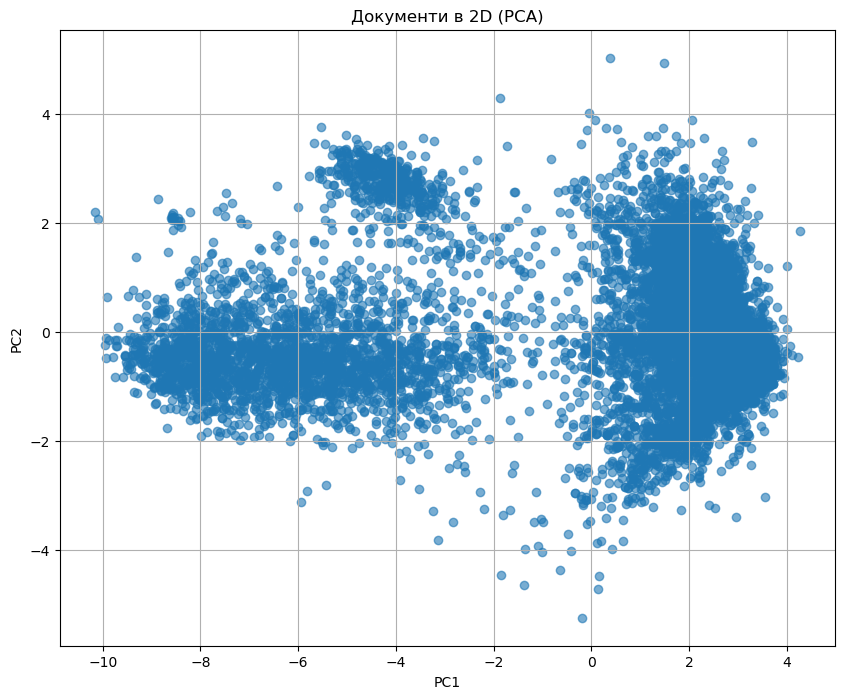

In [16]:
# Task 2

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Підготовка середніх векторів документів 
doc_vectors = []
for tokens in sentences:
    # збираємо вектори слів, які є в моделі
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        # усереднюємо вектори документу
        doc_vectors.append(np.mean(vectors, axis=0))

doc_vectors = np.array(doc_vectors, dtype=np.float32)
# позбавляємося NaN/Inf, якщо вони є
doc_vectors = np.nan_to_num(doc_vectors)

# PCA в 2D 
pca = PCA(n_components=2, random_state=42)
doc_2d = pca.fit_transform(doc_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(doc_2d[:, 0], doc_2d[:, 1], alpha=0.6)
plt.title('Документи в 2D (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


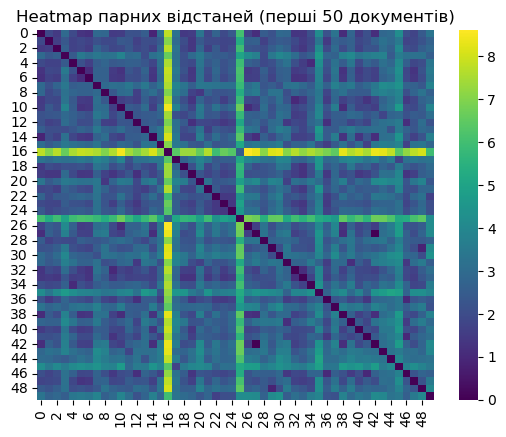

In [17]:
from sklearn.metrics import pairwise_distances
import seaborn as sns

# обчислюємо матрицю евклідових відстаней (n_docs × n_docs)
dist_matrix = pairwise_distances(doc_vectors, metric='euclidean')

# показуємо перші 50 документів у вигляді теплової карти
sns.heatmap(dist_matrix[:50, :50], cmap='viridis')
plt.title('Heatmap парних відстаней (перші 50 документів)')
plt.show()


In [20]:
# Task 3

from gensim.test.utils import datapath
import gensim.downloader as api

# Шлях до файлу з парами
pairs_path = datapath("wordsim353.tsv")

# Завантажуємо GloVe
glove = api.load("glove-wiki-gigaword-50")

# Оцінка власної моделі
w2v_res = model.wv.evaluate_word_pairs(pairs_path, delimiter="\t", case_insensitive=True)
# Витягуємо кореляції:
w2v_pearson = w2v_res[0][0]
w2v_spearman = w2v_res[1][0]

# Оцінка GloVe
glove_res = glove.evaluate_word_pairs(pairs_path, delimiter="\t", case_insensitive=True)
glove_pearson = glove_res[0][0]
glove_spearman = glove_res[1][0]

print("=== Власна Word2Vec-модель ===")
print(f"Pearson’s r:  {w2v_pearson:.4f}")
print(f"Spearman’s ρ: {w2v_spearman:.4f}")

print("\n=== GloVe (wiki-gigaword-50) ===")
print(f"Pearson’s r:  {glove_pearson:.4f}")
print(f"Spearman’s ρ: {glove_spearman:.4f}")


=== Власна Word2Vec-модель ===
Pearson’s r:  0.3412
Spearman’s ρ: 0.3168

=== GloVe (wiki-gigaword-50) ===
Pearson’s r:  0.5066
Spearman’s ρ: 0.5033
